In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class SingleNeuron():
    def __init__(self, input_size, output_size, act_func):
        self.W = np.random.randn(input_size, output_size)
        self.b = np.random.randn(output_size).reshape((-1,1))
        self.L = np.ones(output_size).reshape((-1,1)) # this is for scaling the output of sigmoid function
        self.name = act_func
        if act_func == "linear":
            self.act_func = lambda x: x
        elif act_func == "sigmoid":
            self.act_func = lambda x: 1/(1+np.exp(-x))
        elif act_func == "relu":
            self.act_func = lambda x: np.maximum(0, x)
    
    def forward(self, x):
        self.x = x
        self.output = self.L*self.act_func(self.x @ self.W + self.b)
        return self.output
    
    def calculate_grad(self, y_train, y_h, X_train):
        if self.name == "sigmoid":
            self.W_grad = -2 * np.mean((y_train - y_h) * self.L * (1-y_h/self.L)*y_h/self.L* X_train, axis=0).reshape(-1,1)
            self.b_grad = -2 * np.mean((y_train - y_h) * self.L * (1-y_h/self.L)*y_h/self.L, axis=0).reshape(-1,1)
            self.L_grad = -2 * np.mean((y_train - y_h) * y_h/self.L, axis=0).reshape(-1,1)
        elif self.name == "linear":
            self.W_grad = -2 * np.mean((y_train - y_h) * X_train, axis=0).reshape(-1,1)
            self.b_grad = -2 * np.mean((y_train - y_h), axis=0).reshape(-1,1)
            self.L_grad = 0   
    def update(self, lr):
        self.W -= lr * self.W_grad
        self.b -= lr * self.b_grad
        self.L -= lr * self.L_grad
    
    def train(self, X_train, y_train, lr, epochs):
        self.loss = []
        for epoch in range(epochs):
            y_h = self.forward(X_train)
            self.calculate_grad(y_train, y_h, X_train)
            self.update(lr)
            self.loss.append(np.mean((y_train - y_h)**2))
            # if epoch % 250 == 0:
            #     print("Epoch: {}, Loss: {}".format(epoch, self.loss[-1]))
    
    def calculate_Rsquared(self, X_test, y_test):
        y_h = self.forward(X_test)
        R2 = 1 - np.sum((y_test - y_h)**2) / np.sum((y_test - np.mean(y_test))**2)
        return R2

In [3]:
#1. Generate data

In [4]:
def generate_data(n_input, m):
    X = np.random.normal(10, 3, (m, n_input)) # Sample random integers from 0 to 10 from a Gaussian distribution into an array of shape (m, n_input)
    y = np.sum(np.power(X * np.array([2,.5,.5,1,2,4]), 2), axis=1).reshape((-1,1)) # y = 2 * x_0 + 0.5 * x_1 + 0.5 * x_2 + 1 * x_3 + 2 * x_4 + 4 * x_5

    # add noise to X and y
    X += np.random.normal(0, 0.1, X.shape)
    y += np.random.normal(0, 0.1, y.shape)

    # # # normalize y and X between 0 and 1
    y = (y - np.min(y)) / (np.max(y) - np.min(y))
    X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0)) # converges faster when X is normalized(for some reason)
    # divide X and y into training and test sets
    X_train, X_test, y_train, y_test = X[:800], X[800:], y[:800], y[800:]
    return X_train, X_test, y_train, y_test

In [19]:
n_input = 6
m = 1000
X_train, X_test, y_train, y_test = generate_data(n_input, m)

In [20]:
# 2. Train the models

In [21]:
linearModel = SingleNeuron(n_input, 1, "linear")
sigmoidModel = SingleNeuron(n_input, 1, "sigmoid")

In [36]:
epochs = 10000
lr = .1e-2
linearModel.train(X_train, y_train, lr, epochs)
sigmoidModel.train(X_train, y_train, lr, epochs)

In [37]:
linearModel.calculate_Rsquared(X_test, y_test), sigmoidModel.calculate_Rsquared(X_test, y_test)

(0.8542671830322012, -0.08663089559682802)

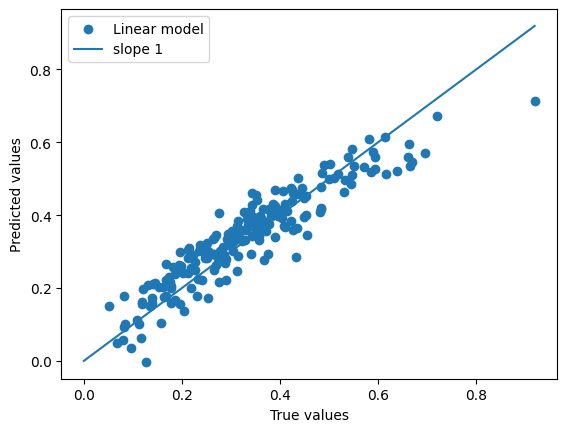

In [38]:
plt.scatter(y_test, linearModel.forward(X_test), label="Linear model")
# plot a line with slope 1
plt.plot([0,np.max(y_test)], [0,np.max(y_test)], label="slope 1")
plt.legend()
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

Dropped 1 features
Linear model R2: -1.392069302182787, Sigmoid model R2: -0.08751792427784344
Dropped 2 features
Linear model R2: -3.6606443363655767, Sigmoid model R2: 0.09298836257870413
Dropped 3 features
Linear model R2: 0.6648097226826515, Sigmoid model R2: 0.3653105892216786
Dropped 4 features
Linear model R2: 0.712788101874676, Sigmoid model R2: -0.027930434464691345
Dropped 5 features
Linear model R2: -0.06738502323064366, Sigmoid model R2: 0.24503706387728263


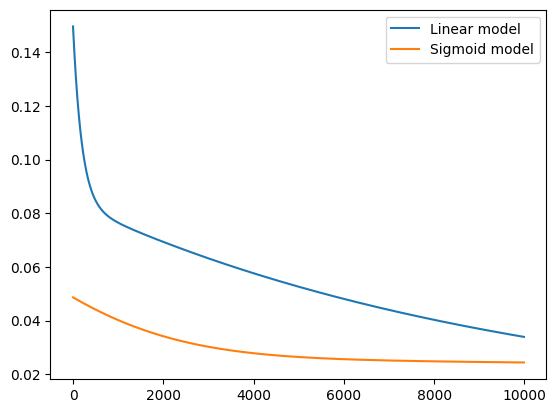

In [11]:
epochs = 10000
lr = .1e-2
R2_linear = []
R2_sigmoid = []
for i in range(1, n_input):
    X_train, X_test, y_train, y_test = generate_data(n_input, m)
    # drop the last i features
    # X_train, X_test = X_train[:, :-i], X_test[:, :-i]
    # drop the first i features
    X_train, X_test = X_train[:, i:], X_test[:, i:]
    linearModel = SingleNeuron(n_input-i, 1, "linear")
    sigmoidModel = SingleNeuron(n_input-i, 1, "sigmoid")
    linearModel.train(X_train, y_train, lr, epochs)
    sigmoidModel.train(X_train, y_train, lr, epochs)
    R2_linear.append(linearModel.calculate_Rsquared(X_test, y_test))
    R2_sigmoid.append(sigmoidModel.calculate_Rsquared(X_test, y_test))
    print("Dropped {} features".format(i))
    print("Linear model R2: {}, Sigmoid model R2: {}".format(R2_linear[-1], R2_sigmoid[-1]))

# 3. Plot the loss
plt.plot(linearModel.loss[10:], label="Linear model")
plt.plot(sigmoidModel.loss[10:], label="Sigmoid model")
plt.legend()

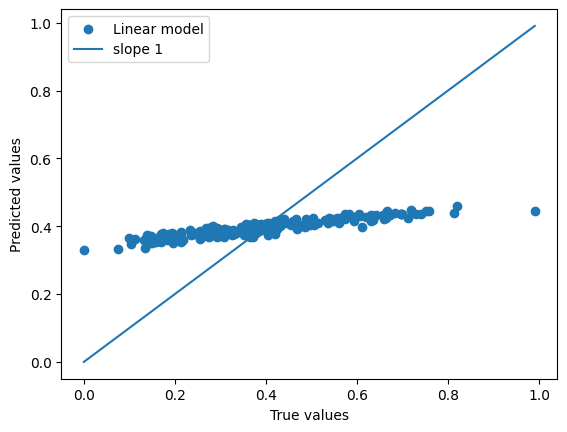

In [12]:
plt.scatter(y_test, sigmoidModel.forward(X_test), label="Linear model")
# plot a line with slope 1
plt.plot([0,np.max(y_test)], [0,np.max(y_test)], label="slope 1")
plt.legend()
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

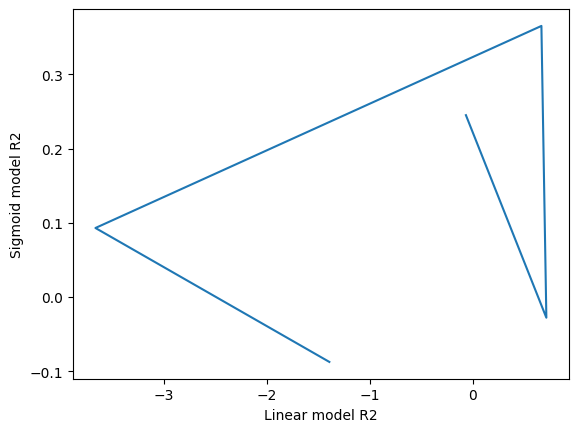

In [13]:
plt.plot(R2_linear, R2_sigmoid)
plt.xlabel("Linear model R2")
plt.ylabel("Sigmoid model R2")
plt.show()